In [58]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_ollama import ChatOllama
from langgraph.checkpoint.memory import MemorySaver

In [59]:
from langgraph.graph.message import add_messages
class ChatState(TypedDict):
    
    messages: Annotated[list[BaseMessage], add_messages] # basemessage is a flexible message
    

In [60]:
# define llm
llm = ChatOllama(model='gemma3:4b')

In [61]:
def chat_node(state: ChatState):
    
    #take user query from state
    messages = state['messages']
    #send to llm
    response = llm.invoke(messages)
    #response store state
    return {'messages':[response]}

In [62]:
checkpointer = MemorySaver()
graph = StateGraph(ChatState)

#add nodes
graph.add_node('chat_node', chat_node)

In [63]:
# add edges
graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

In [64]:
chatbot = graph.compile(checkpointer=checkpointer)

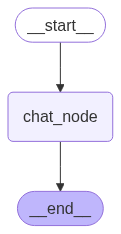

In [65]:
chatbot

In [66]:
thread_id = 'l'
while True:
    
    user_message = input('Type here:')
    
    print('User:', user_message)
    
    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break
    
    config = {'configurable': {'thread_id': thread_id}}
    response = chatbot.invoke({'messages': [HumanMessage(content=user_message)]}, config=config)
    
    print('AI', response['messages'][-1].content)

User: hi
AI Hi there! How can I help you today? 😊 

Do you want to:

*   Chat about something?
*   Ask me a question?
*   Play a game?
*   Get some information?

Just let me know what you're thinking!
User: can you tell me about gpt 5
AI Okay, let's talk about GPT-5! It's a fascinating and, as of right now, still largely *anticipated* topic. Here's what we know, what's being speculated, and the key differences from its predecessors:

**What We Know (Officially Announced - as of November 2, 2023):**

* **It's Coming (Eventually):** OpenAI has announced that GPT-5 is in development, but they haven’t given a firm release date. They've stated they plan to release it sometime in **2024**.
* **Significant Improvements:**  They’ve explicitly stated that GPT-5 will represent a "major step up" from GPT-4 in terms of capabilities and performance.
* **Multimodal Capabilities – A HUGE Change:** This is the most significant announced advancement. GPT-5 will be *truly multimodal*, meaning it will be

In [67]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='c83e570d-73cf-4e22-84f5-09160062cf3b'), AIMessage(content="Hi there! How can I help you today? 😊 \n\nDo you want to:\n\n*   Chat about something?\n*   Ask me a question?\n*   Play a game?\n*   Get some information?\n\nJust let me know what you're thinking!", additional_kwargs={}, response_metadata={'model': 'gemma3:4b', 'created_at': '2025-08-08T09:45:31.4731598Z', 'done': True, 'done_reason': 'stop', 'total_duration': 18142386300, 'load_duration': 9324158100, 'prompt_eval_count': 10, 'prompt_eval_duration': 1193610900, 'eval_count': 59, 'eval_duration': 7613022300, 'model_name': 'gemma3:4b'}, id='run--543d31fe-4653-47ad-90cf-e4ef63fde4d9-0', usage_metadata={'input_tokens': 10, 'output_tokens': 59, 'total_tokens': 69}), HumanMessage(content='can you tell me about gpt 5', additional_kwargs={}, response_metadata={}, id='3234462e-fe8c-4f5e-9876-303fab35ed29'), AIMessage(content='O